# Predicting House Sale prices

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

#### Read in dataset

In [2]:
houses = pd.read_csv('AmesHousing.tsv',delimiter='\t')

In [3]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Creating initial functions use for prediction

In [4]:
def transform_features(df):
    return df

In [5]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [6]:
## Trains and tests a model
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    num_train = train.select_dtypes(include=['int','float'])
    num_test = test.select_dtypes(include=['int','float'])
    
    features = num_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    
    prediction = lr.predict(test[features])
    
    rmse = np.sqrt(mse(test['SalePrice'],prediction))
    return rmse

In [7]:
## Test functions:
t_f = transform_features(houses)
s_f = select_features(t_f)
t_a_t = train_and_test(s_f)

t_a_t

57088.25161263909

Above, we see our initial RMSE value from our initial functions. This can definitely be improved further.

## Feature Engineering
In this section, we will attempt to make sense of the data and altering it such as:
- Removing columns with a lot of null values
- Remove columns that leak information about the sale (like the year the sale happened)
- Transform features to a proper format (numerical, categorical, filling in missing values for numeric columns)
- Create new features by combining other features

In [8]:
house_copy = houses.copy()

house_copy.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
house_copy.shape

(2930, 82)

In [10]:
## Check for null values in each column
house_copy.isnull().sum().sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

We can see features such as Pool QC, Misc Feature, Alley, Fence etc have a lot of missing values which would not be good for our prediction. Let's get rid of columns with more than 5% missing values.

In [11]:
## Have only columns greater than 0 NaN and less than 147 (5%) NaN, and also only include numeric values
houses_copy_null_cnt = house_copy.isnull().sum()
house_copy_no_null_num = (house_copy[houses_copy_null_cnt[houses_copy_null_cnt>0].index & 
                                houses_copy_null_cnt[houses_copy_null_cnt<147].index]).select_dtypes(include=['int', 'float'])

C:\Users\araf7\AppData\Local\Temp/ipykernel_9676/2153945142.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  house_copy_no_null_num = (house_copy[houses_copy_null_cnt[houses_copy_null_cnt>0].index &


In [12]:
## Check for null values in each column again
house_copy_no_null_num.isnull().sum().sort_values(ascending=False)

Mas Vnr Area      23
Bsmt Full Bath     2
Bsmt Half Bath     2
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
dtype: int64

In [13]:
house_copy_no_null_num['Mas Vnr Area'].value_counts()

0.0       1748
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: Mas Vnr Area, Length: 445, dtype: int64

As we can see, 9 out of the 82 columns remain meaning that 73 columns from the dataset had more than 25% missing values.

We should now fill the missing values of these columns with the most occuring value (mode of the column).

In [14]:
house_copy_no_null_num = house_copy_no_null_num.fillna(house_copy_no_null_num.mode().iloc[0])

In [15]:
house_copy_no_null_num['Mas Vnr Area'].value_counts()

0.0       1771
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: Mas Vnr Area, Length: 445, dtype: int64

In [16]:
house_copy_no_null_num.isnull().sum().sort_values(ascending=False)

Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Cars       0
Garage Area       0
dtype: int64

As we can see, all the missing values have been replaced by the highest occuring value in the column.

We will add our saleprice column back in and add a new column, years_until_remod which will tell us how long it took for a house to be remodeled since it was built. Another column we will add is the years_sold which tells us the difference between when a house was sold to the date of when it was built.

In [17]:
## add saleprice, year built, and year remod/add back into dataframe
house_copy_no_null_num["Yrs until remod"] = house_copy['Year Remod/Add'] - house_copy['Year Built'] 
house_copy_no_null_num["Yrs until sold"] = house_copy['Yr Sold'] - house_copy['Year Built'] 
house_copy_no_null_num["SalePrice"] = house_copy['SalePrice']

In [18]:
house_copy_no_null_num.head()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area,Yrs until remod,Yrs until sold,SalePrice
0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,2.0,528.0,0,50,215000
1,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1.0,730.0,0,49,105000
2,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1.0,312.0,0,52,172000
3,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,2.0,522.0,0,42,244000
4,0.0,791.0,0.0,137.0,928.0,0.0,0.0,2.0,482.0,1,13,189900


This data here is finally prepared for testing and training, we have dropped null values, replaced null values with the mode, dropped any irrelevant columns, and also created new columns which could be useful for our training.

In [19]:
## Modified transform features function:
def transform_features(df):
    df_copy = df.copy()
    df_copy_null_cnt = df_copy.isnull().sum()
    df_copy_no_null_num = (df_copy[df_copy_null_cnt[df_copy_null_cnt>0].index & 
                                df_copy_null_cnt[df_copy_null_cnt<147].index]).select_dtypes(include=['int', 'float'])
    df_copy_no_null_num = df_copy_no_null_num.fillna(df_copy_no_null_num.mode().iloc[0])
    df_copy_no_null_num["Yrs until remod"] = df_copy['Year Remod/Add'] - df_copy['Year Built'] 
    df_copy_no_null_num["Yrs until sold"] = df_copy['Yr Sold'] - df_copy['Year Built'] 
    df_copy_no_null_num["SalePrice"] = df_copy['SalePrice']
    
    return df_copy_no_null_num

In [20]:
def select_features(df):
    return df

In [21]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    num_train = train.select_dtypes(include=['int','float'])
    num_test = test.select_dtypes(include=['int','float'])
    
    features = num_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    
    prediction = lr.predict(test[features])
    
    rmse = np.sqrt(mse(test['SalePrice'],prediction))
    return rmse

In [22]:
tf = transform_features(houses)

sf = select_features(tf)

tat = train_and_test(sf)

tat

C:\Users\araf7\AppData\Local\Temp/ipykernel_9676/3874509505.py:5: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  df_copy_no_null_num = (df_copy[df_copy_null_cnt[df_copy_null_cnt>0].index &


51977.69910646284

As we can see, our new model using more relevant features has caused our RMSE to drastically decrease from 57,000 to 52,000. We can take this further, by using features which have a significant correlation with SalePrice. Let's do that next.

## Feature Selection

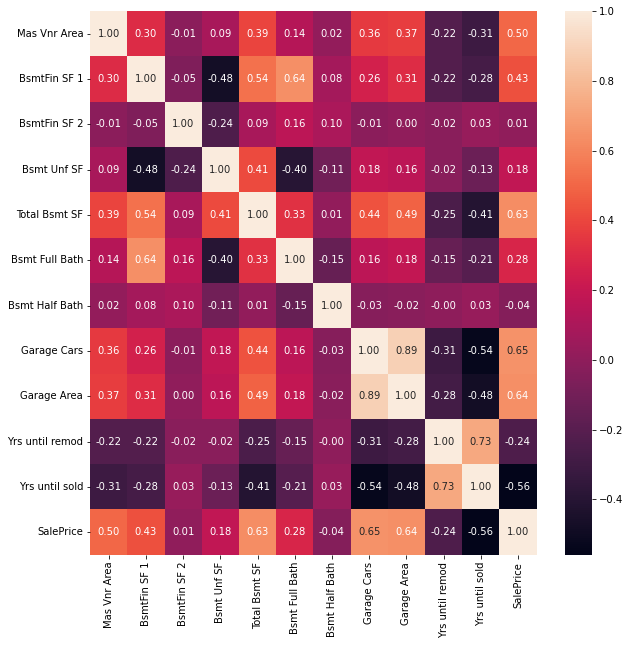

In [23]:
## Correlation heatmap of sf
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(sf.corr(), annot = True, fmt = ".2f")
plt.show()

If we look at SalePrice (bottom row), we can see that many features have relatively strong correlation with SalePrice, such as Mas Vnr Area, Garage Cars, Garage Area etc. We will now only use columns which have an absolute correlation value greater than 0.15.

In [24]:
saleprice_corr = abs(sf.corr()['SalePrice'])

In [25]:
sf = sf.drop(saleprice_corr[saleprice_corr < 0.15].index, axis=1)

Great, we only kept columns which have high correlation to saleprice. Let's alter the select_features function to account for high correlation columns to SalePrice.

In [26]:
def transform_features(df):
    df_copy = df.copy()
    df_copy_null_cnt = df_copy.isnull().sum()
    df_copy_no_null_num = (df_copy[df_copy_null_cnt[df_copy_null_cnt>0].index & 
                                df_copy_null_cnt[df_copy_null_cnt<147].index]).select_dtypes(include=['int', 'float'])
    df_copy_no_null_num = df_copy_no_null_num.fillna(df_copy_no_null_num.mode().iloc[0])
    df_copy_no_null_num["Yrs until remod"] = df_copy['Year Remod/Add'] - df_copy['Year Built'] 
    df_copy_no_null_num["Yrs until sold"] = df_copy['Yr Sold'] - df_copy['Year Built'] 
    df_copy_no_null_num["SalePrice"] = df_copy['SalePrice']
    
    return df_copy_no_null_num

In [27]:
def select_features(df):
    saleprice_corr = abs(df.corr()['SalePrice'])
    df = df.drop(saleprice_corr[saleprice_corr < 0.15].index, axis=1)
    return df

In [28]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    num_train = train.select_dtypes(include=['int','float'])
    num_test = test.select_dtypes(include=['int','float'])
    
    features = num_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    
    prediction = lr.predict(test[features])
    
    rmse = np.sqrt(mse(test['SalePrice'],prediction))
    return rmse

In [29]:
## Test again to see change in rmse
Tf = transform_features(houses)

Sf = select_features(Tf)

Tat = train_and_test(Sf)

Tat

C:\Users\araf7\AppData\Local\Temp/ipykernel_9676/3965672568.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  df_copy_no_null_num = (df_copy[df_copy_null_cnt[df_copy_null_cnt>0].index &


51813.303381480444

Keeping our correlation cutoff at 0.15 may seem low, but through testing, it seems that the rmse increase if we increase the threshold so it is best if we keep it low. The reason the rmse increases may be due to the lack of features used to train our model.

## Train and Test
Let's now add a parameter k,
- When k=0 we perform holdout validation(what we already have been doing)
- When k=1 we perform simple cross validation
- When k>1 we perform k-fold cross validation using k folds

In [30]:
from sklearn.model_selection import KFold

def train_and_test(df,k):
    lr = LinearRegression()
    num_df = df.select_dtypes(include=['integer', 'float'])
    features = num_df.columns.drop("SalePrice")
    
    if k==0:
        train = num_df[:1460]
        test = num_df[1460:]
    
        features = train.columns.drop('SalePrice')
    
        lr.fit(train[features],train['SalePrice'])
    
        prediction = lr.predict(test[features])
    
        rmse = np.sqrt(mse(test['SalePrice'],prediction))
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        rmse_one = np.sqrt(mse(test["SalePrice"], predictions_one))
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        rmse_two = np.sqrt(mse(train["SalePrice"], predictions_two))
        
        avg_rmse = np.mean([rmse_one, rmse_two])

        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_val = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            rmse = np.sqrt(mse(test["SalePrice"], predictions))
            rmse_val.append(rmse)
        avg_rmse = np.mean(rmse_val)
        return avg_rmse


In [31]:
## Test
TF = transform_features(houses)

SF = select_features(TF)

TAT = train_and_test(SF,5)

TAT

C:\Users\araf7\AppData\Local\Temp/ipykernel_9676/3965672568.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  df_copy_no_null_num = (df_copy[df_copy_null_cnt[df_copy_null_cnt>0].index &


46635.0229884046

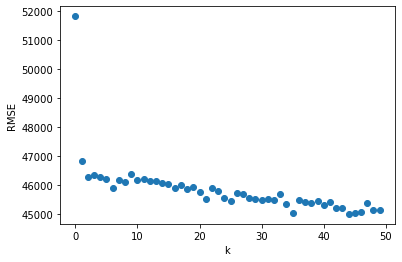

In [33]:
k_list = []
for k in range(0, 50):
    k_list.append(train_and_test(SF, k))

plt.scatter(range(0, 50), k_list)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In conclusion, we can see the trend that as we increase K amount of folds, the rmse tends to decrease (for at least the first 50 values of k).